# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
# FloydHub CIFAR-10 data ID: diSgciLH4WA7HpcHNasP9j
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


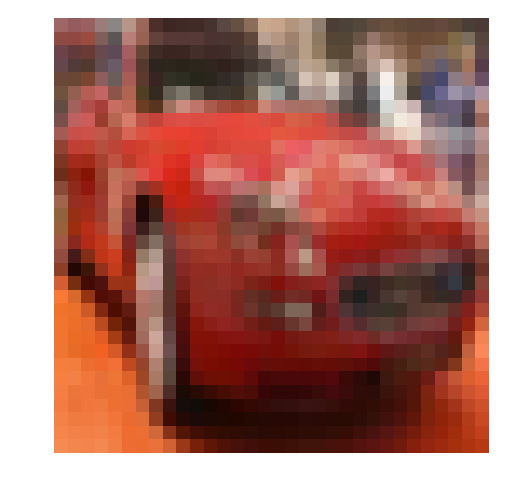

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [4]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x / 255.0


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [5]:
one_hot_encoded_array = []

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    global one_hot_encoded_array
    one_hot_encoded_array = np.zeros((len(x), 10))
    for index in range(0, len(x)):
        one_hot_encoded_array[index, x[index]] = 1
    return one_hot_encoded_array

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)
print("one_hot_encoded_array:\n" + str(one_hot_encoded_array))

Tests Passed
one_hot_encoded_array:
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [8]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]), name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.int32, (None, n_classes), name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, None, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [9]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    filter_height_size = conv_ksize[0]
    filter_width_size = conv_ksize[1]
    filter_size = [1, filter_height_size, filter_width_size, 1]

    x_tensor_depth_size = x_tensor.get_shape().as_list()[-1]
    conv_strides_height_size = conv_strides[0]
    conv_strides_width_size = conv_strides[1]
    stride_size = [1, conv_strides_height_size, conv_strides_width_size, 1]
    
    pool_filter_height_size = pool_ksize[0]
    pool_filter_width_size = pool_ksize[1]
    pool_filter_size = [1, pool_filter_height_size, pool_filter_width_size, 1]
    
    pool_stride_height_size = pool_strides[0]
    pool_stride_width_size = pool_strides[1]
    pool_stride_size = [1, pool_stride_height_size, pool_stride_width_size, 1]
    
    conv_weight = tf.Variable(tf.random_uniform(
        [filter_height_size, filter_width_size, x_tensor_depth_size, conv_num_outputs],
        -1 / np.sqrt(conv_num_outputs),
        1 / np.sqrt(conv_num_outputs)
    ))
    conv_bias = tf.Variable(tf.truncated_normal(
        [conv_num_outputs]
    ))
    
    conv2d = tf.nn.conv2d(x_tensor, conv_weight, stride_size, padding="SAME")
    conv2d = tf.nn.bias_add(conv2d, conv_bias)
    conv2d = tf.nn.max_pool(conv2d, pool_filter_size, pool_stride_size, padding="SAME")
    conv2d = tf.nn.relu(conv2d)
    return conv2d


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    x_tensor_shape = x_tensor.get_shape().as_list()
    flattened_dimensions = np.product(x_tensor_shape[1:])
    return tf.reshape(x_tensor, [-1, flattened_dimensions])

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [11]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    fully_connected_weights = tf.Variable(tf.random_uniform([x_tensor.get_shape().as_list()[1], num_outputs], 
                                                            -1/np.sqrt(num_outputs)), 1/np.sqrt(num_outputs))
    fully_connected_bias = tf.Variable(tf.random_uniform([num_outputs],
                                      -1/np.sqrt(num_outputs), 1/np.sqrt(num_outputs)))
    fully_connected_layer = tf.add(tf.matmul(x_tensor, fully_connected_weights), fully_connected_bias)
    return tf.nn.relu(fully_connected_layer)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [12]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    output_weight = tf.Variable(tf.random_uniform([x_tensor.get_shape().as_list()[1], num_outputs],
                                                 -1/np.sqrt(num_outputs), 1/np.sqrt(num_outputs)))
    output_bias = tf.Variable(tf.random_uniform([num_outputs],
                                               -1/np.sqrt(num_outputs), 1/np.sqrt(num_outputs)))
    return tf.add(tf.matmul(x_tensor, output_weight), output_bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [13]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    convolutional_layer = tf.nn.dropout(x, keep_prob)
    convolutional_layer = conv2d_maxpool(x, 6, (2, 2), (1, 1), (2, 2), (2, 2))
    convolutional_layer = conv2d_maxpool(convolutional_layer, 24, (2, 2), (1, 1), (2, 2), (2, 2))
    #convolutional_layer = conv2d_maxpool(convolutional_layer, 96, (2, 2), (1, 1), (2, 2), (1, 1))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    convolutional_layer = flatten(convolutional_layer)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    convolutional_layer = fully_conn(convolutional_layer, 32)
    #convolutional_layer = tf.nn.dropout(convolutional_layer, keep_prob)
    #convolutional_layer = fully_conn(convolutional_layer, 100)
    
    #convolutional_layer = fully_conn(convolutional_layer, 16)
    #convolutional_layer = tf.nn.dropout(convolutional_layer, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    convolutional_layer_output = output(convolutional_layer, 10)
    
    # TODO: return output
    return convolutional_layer_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [14]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [15]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    global valid_features
    global valid_labels
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    validation_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    
    print("\nFeature Cost: ", loss)
    print("Validation Accuracy: ", validation_accuracy)

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [16]:
# TODO: Tune Parameters
epochs = 300
batch_size = 128
keep_probability = .80

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  
Feature Cost:  8.09338
Validation Accuracy:  0.1118
Epoch  2, CIFAR-10 Batch 1:  
Feature Cost:  2.48907
Validation Accuracy:  0.1082
Epoch  3, CIFAR-10 Batch 1:  
Feature Cost:  2.41041
Validation Accuracy:  0.1616
Epoch  4, CIFAR-10 Batch 1:  
Feature Cost:  2.31365
Validation Accuracy:  0.2132
Epoch  5, CIFAR-10 Batch 1:  
Feature Cost:  2.29005
Validation Accuracy:  0.226
Epoch  6, CIFAR-10 Batch 1:  
Feature Cost:  2.26731
Validation Accuracy:  0.2402
Epoch  7, CIFAR-10 Batch 1:  
Feature Cost:  2.24246
Validation Accuracy:  0.2538
Epoch  8, CIFAR-10 Batch 1:  
Feature Cost:  2.22344
Validation Accuracy:  0.2628
Epoch  9, CIFAR-10 Batch 1:  
Feature Cost:  2.20772
Validation Accuracy:  0.2658
Epoch 10, CIFAR-10 Batch 1:  
Feature Cost:  2.19502
Validation Accuracy:  0.2718
Epoch 11, CIFAR-10 Batch 1:  
Feature Cost:  2.18471
Validation Accuracy:  0.2766
Epoch 12, CIFAR-10 Batch 1:  
Feature Cost:  2.16145
Val

Epoch 101, CIFAR-10 Batch 1:  
Feature Cost:  1.00289
Validation Accuracy:  0.4932
Epoch 102, CIFAR-10 Batch 1:  
Feature Cost:  0.998142
Validation Accuracy:  0.4934
Epoch 103, CIFAR-10 Batch 1:  
Feature Cost:  0.990693
Validation Accuracy:  0.4922
Epoch 104, CIFAR-10 Batch 1:  
Feature Cost:  0.986633
Validation Accuracy:  0.492
Epoch 105, CIFAR-10 Batch 1:  
Feature Cost:  0.979912
Validation Accuracy:  0.493
Epoch 106, CIFAR-10 Batch 1:  
Feature Cost:  0.974792
Validation Accuracy:  0.4928
Epoch 107, CIFAR-10 Batch 1:  
Feature Cost:  0.966447
Validation Accuracy:  0.4928
Epoch 108, CIFAR-10 Batch 1:  
Feature Cost:  0.960302
Validation Accuracy:  0.4926
Epoch 109, CIFAR-10 Batch 1:  
Feature Cost:  0.955058
Validation Accuracy:  0.4924
Epoch 110, CIFAR-10 Batch 1:  
Feature Cost:  0.945384
Validation Accuracy:  0.492
Epoch 111, CIFAR-10 Batch 1:  
Feature Cost:  0.94107
Validation Accuracy:  0.4938
Epoch 112, CIFAR-10 Batch 1:  
Feature Cost:  0.934316
Validation Accuracy:  0.49

Epoch 200, CIFAR-10 Batch 1:  
Feature Cost:  0.661439
Validation Accuracy:  0.4998
Epoch 201, CIFAR-10 Batch 1:  
Feature Cost:  0.66255
Validation Accuracy:  0.5008
Epoch 202, CIFAR-10 Batch 1:  
Feature Cost:  0.661565
Validation Accuracy:  0.4988
Epoch 203, CIFAR-10 Batch 1:  
Feature Cost:  0.654725
Validation Accuracy:  0.5008
Epoch 204, CIFAR-10 Batch 1:  
Feature Cost:  0.651513
Validation Accuracy:  0.5008
Epoch 205, CIFAR-10 Batch 1:  
Feature Cost:  0.654562
Validation Accuracy:  0.5004
Epoch 206, CIFAR-10 Batch 1:  
Feature Cost:  0.653991
Validation Accuracy:  0.4998
Epoch 207, CIFAR-10 Batch 1:  
Feature Cost:  0.651803
Validation Accuracy:  0.5006
Epoch 208, CIFAR-10 Batch 1:  
Feature Cost:  0.651211
Validation Accuracy:  0.5002
Epoch 209, CIFAR-10 Batch 1:  
Feature Cost:  0.647417
Validation Accuracy:  0.5012
Epoch 210, CIFAR-10 Batch 1:  
Feature Cost:  0.647065
Validation Accuracy:  0.5014
Epoch 211, CIFAR-10 Batch 1:  
Feature Cost:  0.645711
Validation Accuracy:  

Epoch 298, CIFAR-10 Batch 1:  
Feature Cost:  0.564895
Validation Accuracy:  0.4888
Epoch 299, CIFAR-10 Batch 1:  
Feature Cost:  0.562021
Validation Accuracy:  0.4864
Epoch 300, CIFAR-10 Batch 1:  
Feature Cost:  0.562916
Validation Accuracy:  0.4858


### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  
Feature Cost:  2.88365
Validation Accuracy:  0.0834
Epoch  1, CIFAR-10 Batch 2:  
Feature Cost:  2.43588
Validation Accuracy:  0.093
Epoch  1, CIFAR-10 Batch 3:  
Feature Cost:  2.18132
Validation Accuracy:  0.1012
Epoch  1, CIFAR-10 Batch 4:  
Feature Cost:  2.32088
Validation Accuracy:  0.121
Epoch  1, CIFAR-10 Batch 5:  
Feature Cost:  2.33618
Validation Accuracy:  0.1338
Epoch  2, CIFAR-10 Batch 1:  
Feature Cost:  2.36183
Validation Accuracy:  0.146
Epoch  2, CIFAR-10 Batch 2:  
Feature Cost:  2.33949
Validation Accuracy:  0.1594
Epoch  2, CIFAR-10 Batch 3:  
Feature Cost:  2.09996
Validation Accuracy:  0.1502
Epoch  2, CIFAR-10 Batch 4:  
Feature Cost:  2.17611
Validation Accuracy:  0.1786
Epoch  2, CIFAR-10 Batch 5:  
Feature Cost:  2.2621
Validation Accuracy:  0.197
Epoch  3, CIFAR-10 Batch 1:  
Feature Cost:  2.27753
Validation Accuracy:  0.1966
Epoch  3, CIFAR-10 Batch 2:  
Feature Cost:  2.23169
Validation Accuracy:  0.2024
Epoch  3,

Epoch 21, CIFAR-10 Batch 2:  
Feature Cost:  1.32416
Validation Accuracy:  0.5224
Epoch 21, CIFAR-10 Batch 3:  
Feature Cost:  1.03987
Validation Accuracy:  0.5258
Epoch 21, CIFAR-10 Batch 4:  
Feature Cost:  1.17618
Validation Accuracy:  0.5166
Epoch 21, CIFAR-10 Batch 5:  
Feature Cost:  1.32353
Validation Accuracy:  0.523
Epoch 22, CIFAR-10 Batch 1:  
Feature Cost:  1.49658
Validation Accuracy:  0.5178
Epoch 22, CIFAR-10 Batch 2:  
Feature Cost:  1.30574
Validation Accuracy:  0.5294
Epoch 22, CIFAR-10 Batch 3:  
Feature Cost:  1.01549
Validation Accuracy:  0.529
Epoch 22, CIFAR-10 Batch 4:  
Feature Cost:  1.15546
Validation Accuracy:  0.5226
Epoch 22, CIFAR-10 Batch 5:  
Feature Cost:  1.29557
Validation Accuracy:  0.528
Epoch 23, CIFAR-10 Batch 1:  
Feature Cost:  1.47653
Validation Accuracy:  0.5224
Epoch 23, CIFAR-10 Batch 2:  
Feature Cost:  1.28273
Validation Accuracy:  0.5346
Epoch 23, CIFAR-10 Batch 3:  
Feature Cost:  0.997272
Validation Accuracy:  0.5328
Epoch 23, CIFAR-10

Epoch 41, CIFAR-10 Batch 2:  
Feature Cost:  0.967776
Validation Accuracy:  0.568
Epoch 41, CIFAR-10 Batch 3:  
Feature Cost:  0.781165
Validation Accuracy:  0.5636
Epoch 41, CIFAR-10 Batch 4:  
Feature Cost:  0.878845
Validation Accuracy:  0.5534
Epoch 41, CIFAR-10 Batch 5:  
Feature Cost:  1.07648
Validation Accuracy:  0.562
Epoch 42, CIFAR-10 Batch 1:  
Feature Cost:  1.25478
Validation Accuracy:  0.5654
Epoch 42, CIFAR-10 Batch 2:  
Feature Cost:  0.95522
Validation Accuracy:  0.5698
Epoch 42, CIFAR-10 Batch 3:  
Feature Cost:  0.77452
Validation Accuracy:  0.5632
Epoch 42, CIFAR-10 Batch 4:  
Feature Cost:  0.867309
Validation Accuracy:  0.557
Epoch 42, CIFAR-10 Batch 5:  
Feature Cost:  1.07039
Validation Accuracy:  0.5628
Epoch 43, CIFAR-10 Batch 1:  
Feature Cost:  1.24299
Validation Accuracy:  0.5706
Epoch 43, CIFAR-10 Batch 2:  
Feature Cost:  0.939868
Validation Accuracy:  0.5692
Epoch 43, CIFAR-10 Batch 3:  
Feature Cost:  0.761664
Validation Accuracy:  0.5652
Epoch 43, CIF

Epoch 61, CIFAR-10 Batch 2:  
Feature Cost:  0.813706
Validation Accuracy:  0.5872
Epoch 61, CIFAR-10 Batch 3:  
Feature Cost:  0.666961
Validation Accuracy:  0.5858
Epoch 61, CIFAR-10 Batch 4:  
Feature Cost:  0.73274
Validation Accuracy:  0.5836
Epoch 61, CIFAR-10 Batch 5:  
Feature Cost:  0.925004
Validation Accuracy:  0.584
Epoch 62, CIFAR-10 Batch 1:  
Feature Cost:  1.1082
Validation Accuracy:  0.5924
Epoch 62, CIFAR-10 Batch 2:  
Feature Cost:  0.808967
Validation Accuracy:  0.5848
Epoch 62, CIFAR-10 Batch 3:  
Feature Cost:  0.663811
Validation Accuracy:  0.586
Epoch 62, CIFAR-10 Batch 4:  
Feature Cost:  0.728973
Validation Accuracy:  0.5852
Epoch 62, CIFAR-10 Batch 5:  
Feature Cost:  0.92295
Validation Accuracy:  0.5856
Epoch 63, CIFAR-10 Batch 1:  
Feature Cost:  1.10375
Validation Accuracy:  0.5936
Epoch 63, CIFAR-10 Batch 2:  
Feature Cost:  0.802992
Validation Accuracy:  0.5866
Epoch 63, CIFAR-10 Batch 3:  
Feature Cost:  0.658889
Validation Accuracy:  0.587
Epoch 63, CI

Epoch 81, CIFAR-10 Batch 2:  
Feature Cost:  0.743097
Validation Accuracy:  0.5976
Epoch 81, CIFAR-10 Batch 3:  
Feature Cost:  0.602449
Validation Accuracy:  0.5978
Epoch 81, CIFAR-10 Batch 4:  
Feature Cost:  0.667543
Validation Accuracy:  0.5966
Epoch 81, CIFAR-10 Batch 5:  
Feature Cost:  0.857477
Validation Accuracy:  0.5934
Epoch 82, CIFAR-10 Batch 1:  
Feature Cost:  1.06952
Validation Accuracy:  0.6002
Epoch 82, CIFAR-10 Batch 2:  
Feature Cost:  0.742559
Validation Accuracy:  0.5978
Epoch 82, CIFAR-10 Batch 3:  
Feature Cost:  0.599978
Validation Accuracy:  0.596
Epoch 82, CIFAR-10 Batch 4:  
Feature Cost:  0.663393
Validation Accuracy:  0.5964
Epoch 82, CIFAR-10 Batch 5:  
Feature Cost:  0.858179
Validation Accuracy:  0.5948
Epoch 83, CIFAR-10 Batch 1:  
Feature Cost:  1.06807
Validation Accuracy:  0.6022
Epoch 83, CIFAR-10 Batch 2:  
Feature Cost:  0.740485
Validation Accuracy:  0.599
Epoch 83, CIFAR-10 Batch 3:  
Feature Cost:  0.595939
Validation Accuracy:  0.5956
Epoch 83

Epoch 101, CIFAR-10 Batch 2:  
Feature Cost:  0.716199
Validation Accuracy:  0.6062
Epoch 101, CIFAR-10 Batch 3:  
Feature Cost:  0.549651
Validation Accuracy:  0.5942
Epoch 101, CIFAR-10 Batch 4:  
Feature Cost:  0.610984
Validation Accuracy:  0.594
Epoch 101, CIFAR-10 Batch 5:  
Feature Cost:  0.828071
Validation Accuracy:  0.5972
Epoch 102, CIFAR-10 Batch 1:  
Feature Cost:  1.04385
Validation Accuracy:  0.6082
Epoch 102, CIFAR-10 Batch 2:  
Feature Cost:  0.714707
Validation Accuracy:  0.6056
Epoch 102, CIFAR-10 Batch 3:  
Feature Cost:  0.550498
Validation Accuracy:  0.5924
Epoch 102, CIFAR-10 Batch 4:  
Feature Cost:  0.609731
Validation Accuracy:  0.5944
Epoch 102, CIFAR-10 Batch 5:  
Feature Cost:  0.828574
Validation Accuracy:  0.5974
Epoch 103, CIFAR-10 Batch 1:  
Feature Cost:  1.04328
Validation Accuracy:  0.6082
Epoch 103, CIFAR-10 Batch 2:  
Feature Cost:  0.713044
Validation Accuracy:  0.6062
Epoch 103, CIFAR-10 Batch 3:  
Feature Cost:  0.546837
Validation Accuracy:  0.

Epoch 121, CIFAR-10 Batch 1:  
Feature Cost:  1.01133
Validation Accuracy:  0.612
Epoch 121, CIFAR-10 Batch 2:  
Feature Cost:  0.678671
Validation Accuracy:  0.6062
Epoch 121, CIFAR-10 Batch 3:  
Feature Cost:  0.511036
Validation Accuracy:  0.6032
Epoch 121, CIFAR-10 Batch 4:  
Feature Cost:  0.560031
Validation Accuracy:  0.5968
Epoch 121, CIFAR-10 Batch 5:  
Feature Cost:  0.805248
Validation Accuracy:  0.596
Epoch 122, CIFAR-10 Batch 1:  
Feature Cost:  1.00859
Validation Accuracy:  0.612
Epoch 122, CIFAR-10 Batch 2:  
Feature Cost:  0.67842
Validation Accuracy:  0.607
Epoch 122, CIFAR-10 Batch 3:  
Feature Cost:  0.509924
Validation Accuracy:  0.6048
Epoch 122, CIFAR-10 Batch 4:  
Feature Cost:  0.559203
Validation Accuracy:  0.598
Epoch 122, CIFAR-10 Batch 5:  
Feature Cost:  0.803644
Validation Accuracy:  0.594
Epoch 123, CIFAR-10 Batch 1:  
Feature Cost:  1.00831
Validation Accuracy:  0.6118
Epoch 123, CIFAR-10 Batch 2:  
Feature Cost:  0.679604
Validation Accuracy:  0.6064
Ep

Epoch 140, CIFAR-10 Batch 5:  
Feature Cost:  0.798038
Validation Accuracy:  0.6012
Epoch 141, CIFAR-10 Batch 1:  
Feature Cost:  0.967731
Validation Accuracy:  0.6166
Epoch 141, CIFAR-10 Batch 2:  
Feature Cost:  0.676665
Validation Accuracy:  0.613
Epoch 141, CIFAR-10 Batch 3:  
Feature Cost:  0.496057
Validation Accuracy:  0.609
Epoch 141, CIFAR-10 Batch 4:  
Feature Cost:  0.557938
Validation Accuracy:  0.6044
Epoch 141, CIFAR-10 Batch 5:  
Feature Cost:  0.795856
Validation Accuracy:  0.602
Epoch 142, CIFAR-10 Batch 1:  
Feature Cost:  0.967464
Validation Accuracy:  0.6164
Epoch 142, CIFAR-10 Batch 2:  
Feature Cost:  0.674346
Validation Accuracy:  0.6128
Epoch 142, CIFAR-10 Batch 3:  
Feature Cost:  0.494832
Validation Accuracy:  0.608
Epoch 142, CIFAR-10 Batch 4:  
Feature Cost:  0.556456
Validation Accuracy:  0.6046
Epoch 142, CIFAR-10 Batch 5:  
Feature Cost:  0.796137
Validation Accuracy:  0.6014
Epoch 143, CIFAR-10 Batch 1:  
Feature Cost:  0.964187
Validation Accuracy:  0.6

Epoch 160, CIFAR-10 Batch 3:  
Feature Cost:  0.48523
Validation Accuracy:  0.614
Epoch 160, CIFAR-10 Batch 4:  
Feature Cost:  0.560438
Validation Accuracy:  0.6066
Epoch 160, CIFAR-10 Batch 5:  
Feature Cost:  0.751508
Validation Accuracy:  0.6136
Epoch 161, CIFAR-10 Batch 1:  
Feature Cost:  0.942435
Validation Accuracy:  0.615
Epoch 161, CIFAR-10 Batch 2:  
Feature Cost:  0.682257
Validation Accuracy:  0.6108
Epoch 161, CIFAR-10 Batch 3:  
Feature Cost:  0.483571
Validation Accuracy:  0.6146
Epoch 161, CIFAR-10 Batch 4:  
Feature Cost:  0.56084
Validation Accuracy:  0.6062
Epoch 161, CIFAR-10 Batch 5:  
Feature Cost:  0.75106
Validation Accuracy:  0.6142
Epoch 162, CIFAR-10 Batch 1:  
Feature Cost:  0.942313
Validation Accuracy:  0.6154
Epoch 162, CIFAR-10 Batch 2:  
Feature Cost:  0.682021
Validation Accuracy:  0.6116
Epoch 162, CIFAR-10 Batch 3:  
Feature Cost:  0.484004
Validation Accuracy:  0.6154
Epoch 162, CIFAR-10 Batch 4:  
Feature Cost:  0.559363
Validation Accuracy:  0.60

Epoch 180, CIFAR-10 Batch 1:  
Feature Cost:  0.913131
Validation Accuracy:  0.6182
Epoch 180, CIFAR-10 Batch 2:  
Feature Cost:  0.668127
Validation Accuracy:  0.617
Epoch 180, CIFAR-10 Batch 3:  
Feature Cost:  0.473914
Validation Accuracy:  0.6174
Epoch 180, CIFAR-10 Batch 4:  
Feature Cost:  0.571861
Validation Accuracy:  0.6086
Epoch 180, CIFAR-10 Batch 5:  
Feature Cost:  0.739712
Validation Accuracy:  0.6198
Epoch 181, CIFAR-10 Batch 1:  
Feature Cost:  0.913687
Validation Accuracy:  0.6188
Epoch 181, CIFAR-10 Batch 2:  
Feature Cost:  0.666636
Validation Accuracy:  0.6172
Epoch 181, CIFAR-10 Batch 3:  
Feature Cost:  0.471759
Validation Accuracy:  0.6176
Epoch 181, CIFAR-10 Batch 4:  
Feature Cost:  0.570709
Validation Accuracy:  0.608
Epoch 181, CIFAR-10 Batch 5:  
Feature Cost:  0.742533
Validation Accuracy:  0.6186
Epoch 182, CIFAR-10 Batch 1:  
Feature Cost:  0.909665
Validation Accuracy:  0.6192
Epoch 182, CIFAR-10 Batch 2:  
Feature Cost:  0.668966
Validation Accuracy:  0

Epoch 199, CIFAR-10 Batch 4:  
Feature Cost:  0.567317
Validation Accuracy:  0.612
Epoch 199, CIFAR-10 Batch 5:  
Feature Cost:  0.730963
Validation Accuracy:  0.6208
Epoch 200, CIFAR-10 Batch 1:  
Feature Cost:  0.887053
Validation Accuracy:  0.62
Epoch 200, CIFAR-10 Batch 2:  
Feature Cost:  0.671411
Validation Accuracy:  0.6164
Epoch 200, CIFAR-10 Batch 3:  
Feature Cost:  0.465615
Validation Accuracy:  0.6202
Epoch 200, CIFAR-10 Batch 4:  
Feature Cost:  0.566203
Validation Accuracy:  0.6126
Epoch 200, CIFAR-10 Batch 5:  
Feature Cost:  0.729993
Validation Accuracy:  0.6208
Epoch 201, CIFAR-10 Batch 1:  
Feature Cost:  0.885951
Validation Accuracy:  0.6204
Epoch 201, CIFAR-10 Batch 2:  
Feature Cost:  0.669123
Validation Accuracy:  0.616
Epoch 201, CIFAR-10 Batch 3:  
Feature Cost:  0.463748
Validation Accuracy:  0.6208
Epoch 201, CIFAR-10 Batch 4:  
Feature Cost:  0.566447
Validation Accuracy:  0.6114
Epoch 201, CIFAR-10 Batch 5:  
Feature Cost:  0.729737
Validation Accuracy:  0.6

Epoch 219, CIFAR-10 Batch 2:  
Feature Cost:  0.6655
Validation Accuracy:  0.6158
Epoch 219, CIFAR-10 Batch 3:  
Feature Cost:  0.458162
Validation Accuracy:  0.623
Epoch 219, CIFAR-10 Batch 4:  
Feature Cost:  0.560346
Validation Accuracy:  0.6144
Epoch 219, CIFAR-10 Batch 5:  
Feature Cost:  0.73112
Validation Accuracy:  0.6156
Epoch 220, CIFAR-10 Batch 1:  
Feature Cost:  0.859237
Validation Accuracy:  0.6164
Epoch 220, CIFAR-10 Batch 2:  
Feature Cost:  0.666062
Validation Accuracy:  0.6154
Epoch 220, CIFAR-10 Batch 3:  
Feature Cost:  0.457059
Validation Accuracy:  0.6234
Epoch 220, CIFAR-10 Batch 4:  
Feature Cost:  0.559112
Validation Accuracy:  0.6162
Epoch 220, CIFAR-10 Batch 5:  
Feature Cost:  0.730604
Validation Accuracy:  0.6154
Epoch 221, CIFAR-10 Batch 1:  
Feature Cost:  0.857086
Validation Accuracy:  0.616
Epoch 221, CIFAR-10 Batch 2:  
Feature Cost:  0.663966
Validation Accuracy:  0.6152
Epoch 221, CIFAR-10 Batch 3:  
Feature Cost:  0.458487
Validation Accuracy:  0.62

Epoch 238, CIFAR-10 Batch 5:  
Feature Cost:  0.728584
Validation Accuracy:  0.6176
Epoch 239, CIFAR-10 Batch 1:  
Feature Cost:  0.830574
Validation Accuracy:  0.6172
Epoch 239, CIFAR-10 Batch 2:  
Feature Cost:  0.675212
Validation Accuracy:  0.6164
Epoch 239, CIFAR-10 Batch 3:  
Feature Cost:  0.462832
Validation Accuracy:  0.623
Epoch 239, CIFAR-10 Batch 4:  
Feature Cost:  0.551777
Validation Accuracy:  0.6166
Epoch 239, CIFAR-10 Batch 5:  
Feature Cost:  0.72881
Validation Accuracy:  0.6178
Epoch 240, CIFAR-10 Batch 1:  
Feature Cost:  0.830323
Validation Accuracy:  0.6166
Epoch 240, CIFAR-10 Batch 2:  
Feature Cost:  0.677039
Validation Accuracy:  0.6154
Epoch 240, CIFAR-10 Batch 3:  
Feature Cost:  0.462865
Validation Accuracy:  0.6224
Epoch 240, CIFAR-10 Batch 4:  
Feature Cost:  0.55064
Validation Accuracy:  0.6182
Epoch 240, CIFAR-10 Batch 5:  
Feature Cost:  0.726606
Validation Accuracy:  0.6188
Epoch 241, CIFAR-10 Batch 1:  
Feature Cost:  0.828417
Validation Accuracy:  0.

Epoch 258, CIFAR-10 Batch 3:  
Feature Cost:  0.468165
Validation Accuracy:  0.621
Epoch 258, CIFAR-10 Batch 4:  
Feature Cost:  0.534082
Validation Accuracy:  0.6172
Epoch 258, CIFAR-10 Batch 5:  
Feature Cost:  0.701636
Validation Accuracy:  0.6212
Epoch 259, CIFAR-10 Batch 1:  
Feature Cost:  0.798495
Validation Accuracy:  0.6164
Epoch 259, CIFAR-10 Batch 2:  
Feature Cost:  0.692153
Validation Accuracy:  0.6152
Epoch 259, CIFAR-10 Batch 3:  
Feature Cost:  0.467769
Validation Accuracy:  0.6218
Epoch 259, CIFAR-10 Batch 4:  
Feature Cost:  0.531423
Validation Accuracy:  0.6178
Epoch 259, CIFAR-10 Batch 5:  
Feature Cost:  0.700181
Validation Accuracy:  0.6212
Epoch 260, CIFAR-10 Batch 1:  
Feature Cost:  0.799159
Validation Accuracy:  0.6172
Epoch 260, CIFAR-10 Batch 2:  
Feature Cost:  0.689934
Validation Accuracy:  0.6152
Epoch 260, CIFAR-10 Batch 3:  
Feature Cost:  0.468745
Validation Accuracy:  0.6222
Epoch 260, CIFAR-10 Batch 4:  
Feature Cost:  0.530295
Validation Accuracy:  

Epoch 278, CIFAR-10 Batch 1:  
Feature Cost:  0.779388
Validation Accuracy:  0.6242
Epoch 278, CIFAR-10 Batch 2:  
Feature Cost:  0.682631
Validation Accuracy:  0.6142
Epoch 278, CIFAR-10 Batch 3:  
Feature Cost:  0.470551
Validation Accuracy:  0.6222
Epoch 278, CIFAR-10 Batch 4:  
Feature Cost:  0.516126
Validation Accuracy:  0.623
Epoch 278, CIFAR-10 Batch 5:  
Feature Cost:  0.659067
Validation Accuracy:  0.622
Epoch 279, CIFAR-10 Batch 1:  
Feature Cost:  0.778479
Validation Accuracy:  0.6234
Epoch 279, CIFAR-10 Batch 2:  
Feature Cost:  0.683412
Validation Accuracy:  0.6122
Epoch 279, CIFAR-10 Batch 3:  
Feature Cost:  0.467563
Validation Accuracy:  0.622
Epoch 279, CIFAR-10 Batch 4:  
Feature Cost:  0.515881
Validation Accuracy:  0.6236
Epoch 279, CIFAR-10 Batch 5:  
Feature Cost:  0.658082
Validation Accuracy:  0.6226
Epoch 280, CIFAR-10 Batch 1:  
Feature Cost:  0.779289
Validation Accuracy:  0.6238
Epoch 280, CIFAR-10 Batch 2:  
Feature Cost:  0.67739
Validation Accuracy:  0.6

Epoch 297, CIFAR-10 Batch 4:  
Feature Cost:  0.500069
Validation Accuracy:  0.6236
Epoch 297, CIFAR-10 Batch 5:  
Feature Cost:  0.624956
Validation Accuracy:  0.618
Epoch 298, CIFAR-10 Batch 1:  
Feature Cost:  0.777672
Validation Accuracy:  0.6262
Epoch 298, CIFAR-10 Batch 2:  
Feature Cost:  0.669279
Validation Accuracy:  0.6112
Epoch 298, CIFAR-10 Batch 3:  
Feature Cost:  0.4753
Validation Accuracy:  0.6232
Epoch 298, CIFAR-10 Batch 4:  
Feature Cost:  0.500267
Validation Accuracy:  0.6226
Epoch 298, CIFAR-10 Batch 5:  
Feature Cost:  0.622615
Validation Accuracy:  0.6186
Epoch 299, CIFAR-10 Batch 1:  
Feature Cost:  0.777651
Validation Accuracy:  0.6258
Epoch 299, CIFAR-10 Batch 2:  
Feature Cost:  0.668226
Validation Accuracy:  0.6114
Epoch 299, CIFAR-10 Batch 3:  
Feature Cost:  0.473551
Validation Accuracy:  0.6244
Epoch 299, CIFAR-10 Batch 4:  
Feature Cost:  0.500968
Validation Accuracy:  0.6232
Epoch 299, CIFAR-10 Batch 5:  
Feature Cost:  0.624474
Validation Accuracy:  0.

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.622626582278481



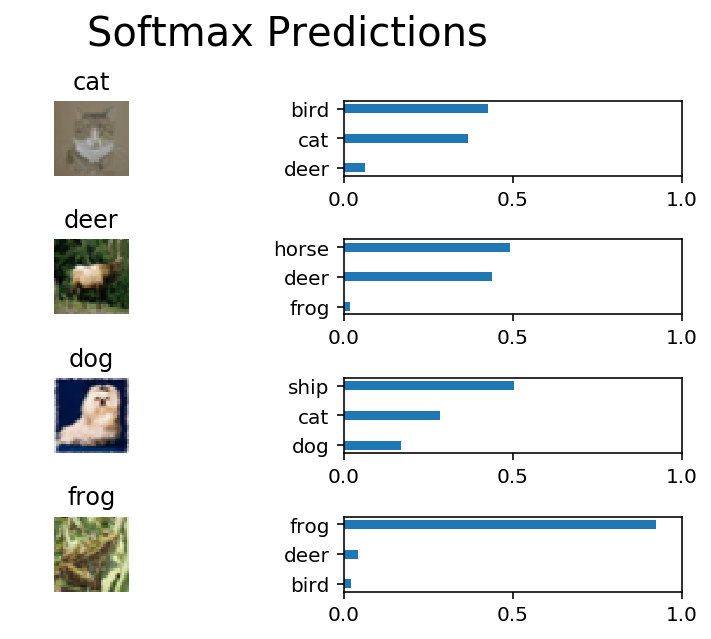

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.